In [1]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.


**Load the different audio datasets**

In [29]:
# experiment = Experiment(api_key="wPsWaajXsaFzxcacTRTZ2iGEr",
#                         project_name="urbansound8k")

from audio_dataset import *
from common_audio import *
urban_sound = AudioDataSet('./../UrbanSound8K/audio', sr=8000, duration=5.0)
libri_sound = AudioDataSet('./../LibriSpeech', sr=8000, duration=5.0)

In [52]:
def show_six_spectrograms(spectrograms, sr, figsize=(10,4), y_axis='hz'):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1, 7):
        ax = fig.add_subplot(2, 3, i)
        
def load_csv(self):         
        df = pd.read_csv('./../UrbanSound8K/metadata/UrbanSound8K.csv')
        labels = list(df['class'].unique())
        files = dict()
        for i in range(len(labels)):
            tmp = df[df['class'] == labels[i]][:1].reset_index()
            path = 'UrbanSound8K/audio/fold{}/{}'.format(tmp['fold'][0], tmp['slice_file_name'][0])
            files[labels[i]] = path
            

<Figure size 432x288 with 0 Axes>

**Start to play around with the urban sound dataset**

In [3]:
y = urban_sound.load([9])
play_audio(y, urban_sound.sr)

**This is testing on complex, log, and log-magnitude+phase spectrograms with different types of background noise**

Engine sound


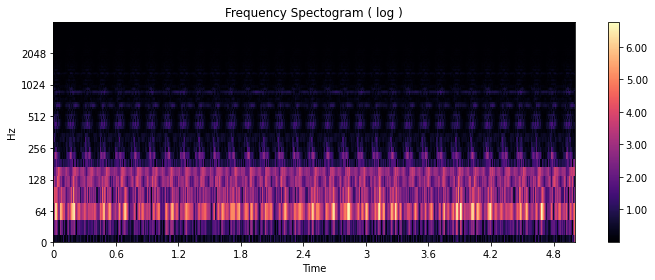





Large crowd background noise


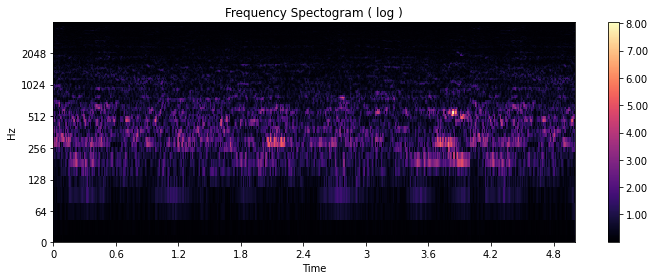





Dog barking


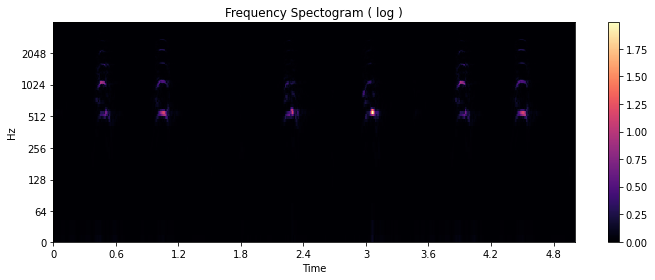





Dog barking 2


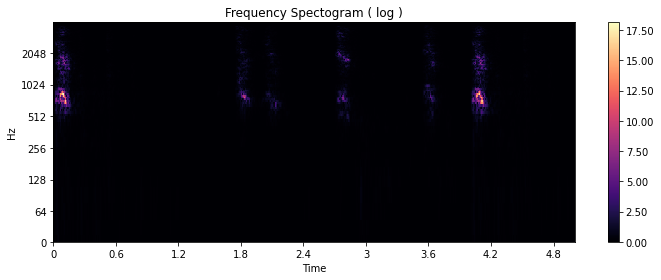





True white noise


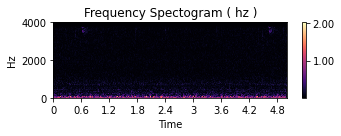

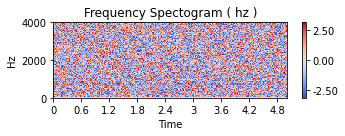

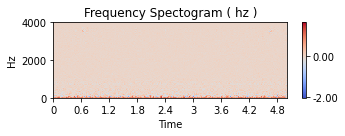

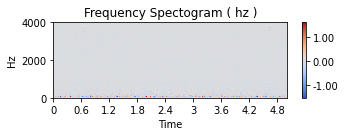

In [54]:
#how to get class labels from the sond


sr = urban_sound.sr
duration = urban_sound.duration
y = urban_sound.load([9])[0]

print("Engine sound")
play_audio(y, sr)
spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)
show_spectrogram(spectrogram[0], sr, y_axis='log')
plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)
print('\n\n\n')

y = urban_sound.load([1])[0]

print("Large crowd background noise")
play_audio(y, sr)
spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)
show_spectrogram(spectrogram[0], sr, y_axis='log')
plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)
print('\n\n\n')

y = urban_sound.load([0])[0]


print("Dog barking")
play_audio(y, sr)
spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)
show_spectrogram(spectrogram[0], sr, y_axis='log')
plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)
print('\n\n\n')



y = urban_sound.load([5])[0]


print("Dog barking 2")
play_audio(y, sr)
spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)
show_spectrogram(spectrogram[0], sr, y_axis='log')
plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)
print('\n\n\n')



y = urban_sound.load([12])[0]


print("True white noise")
play_audio(y, sr)
spectrogram = audio_to_spectrogram(np.array([y]), sr, mel=False)
show_complete_spectrogram(spectrogram[0], sr)
plt.show()
play_audio(spectrogram_to_audio(spectrogram, sr, mel=False), sr)
print('\n\n\n')

**Testing on normal, complex sound using magnitude plots**

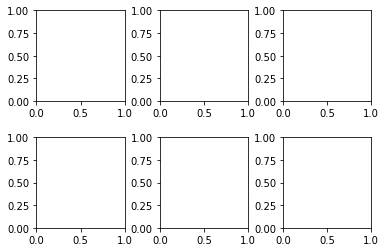